In [199]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [161]:
bank_data = pd.read_csv('/Users/schottmadison/DSDJ/ibm_explainability/bank/bank-full.csv', sep=';')

In [162]:
bank_data_copy = bank_data.copy()

In [163]:
bank_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [164]:
bank_data_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [165]:
boolean_dict = {'yes': 1, 'no': 0}
bank_data_copy.y = bank_data_copy.y.map(boolean_dict)

In [166]:
bank_data_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


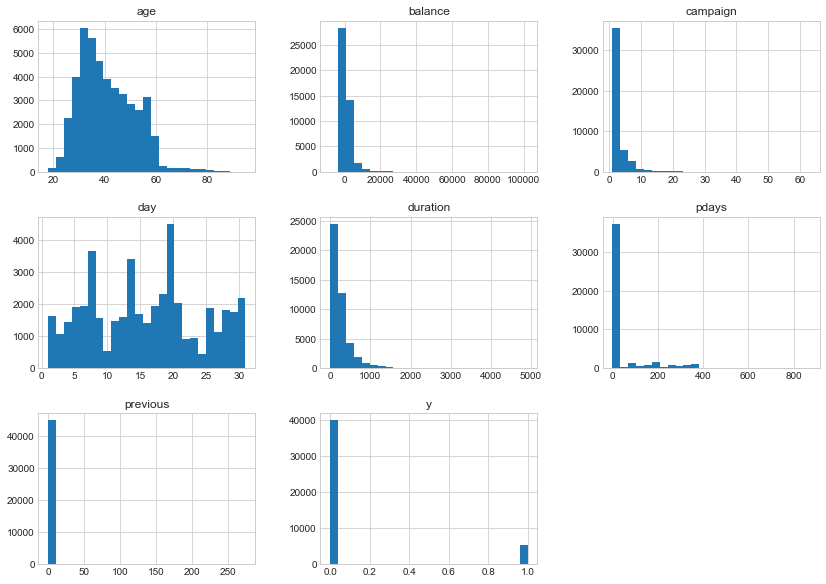

In [23]:
plt.style.use('seaborn-whitegrid')
bank_data_copy.hist(bins=25, figsize=(14,10))
plt.show()

In [24]:
bank_data_copy.age.median()

39.0

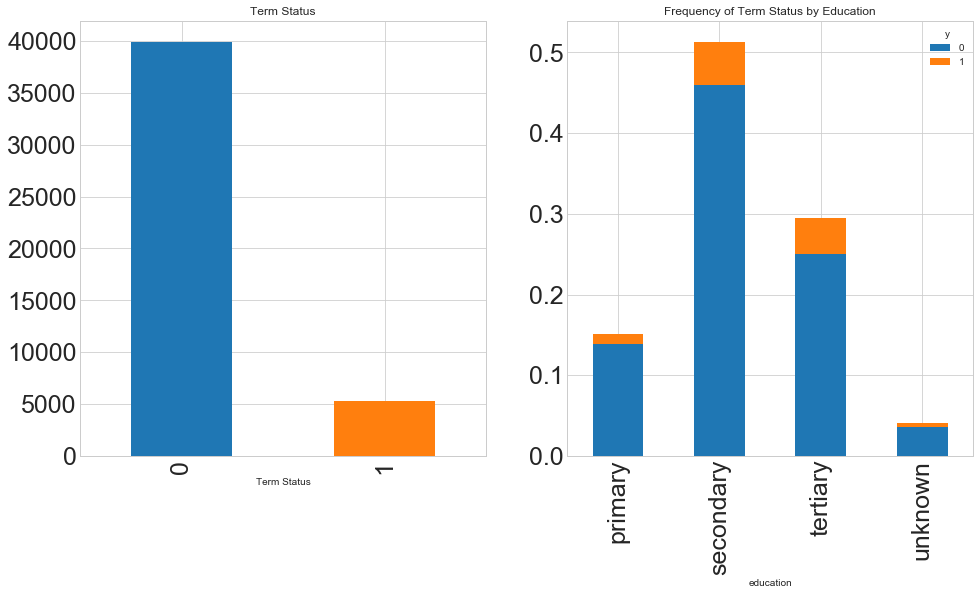

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

bank_data_copy.y.value_counts().plot(kind='bar', title="Term Status", ax=ax[0], fontsize=25)
ax[0].set(xlabel='Term Status')

bank_data_copy.groupby(['education', 'y']).size().groupby(level=0).apply(lambda x: x/bank_data_copy.shape[0]).unstack().plot(kind='bar', title= "Frequency of Term Status by Education", ax=ax[1], fontsize=25, stacked=True)

In [53]:
bank_data_copy.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [55]:
bank_data_copy.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [167]:
bank_data_copy.housing = bank_data_copy.housing.map(boolean_dict)

In [176]:
bank_data_copy.default = bank_data_copy.default.map(boolean_dict)

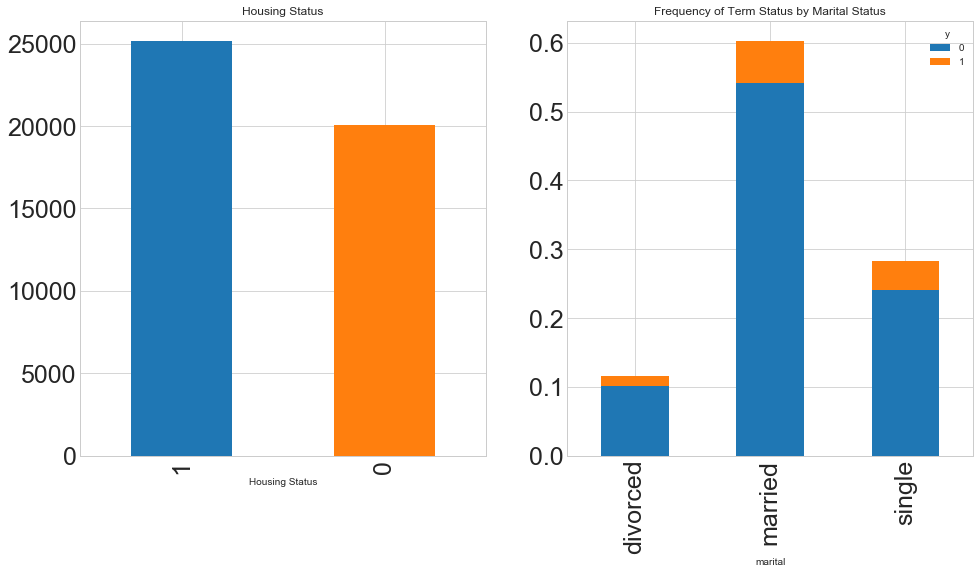

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
bank_data_copy.housing.value_counts().plot(kind='bar', title="Housing Status", ax=ax[0], fontsize=25)
ax[0].set(xlabel='Housing Status')
bank_data_copy.groupby(['marital', 'y']).size().groupby(level=0).apply(lambda x: x/bank_data_copy.shape[0]).unstack().plot(kind='bar', title= "Frequency of Term Status by Marital Status", ax=ax[1], fontsize=25, stacked=True)

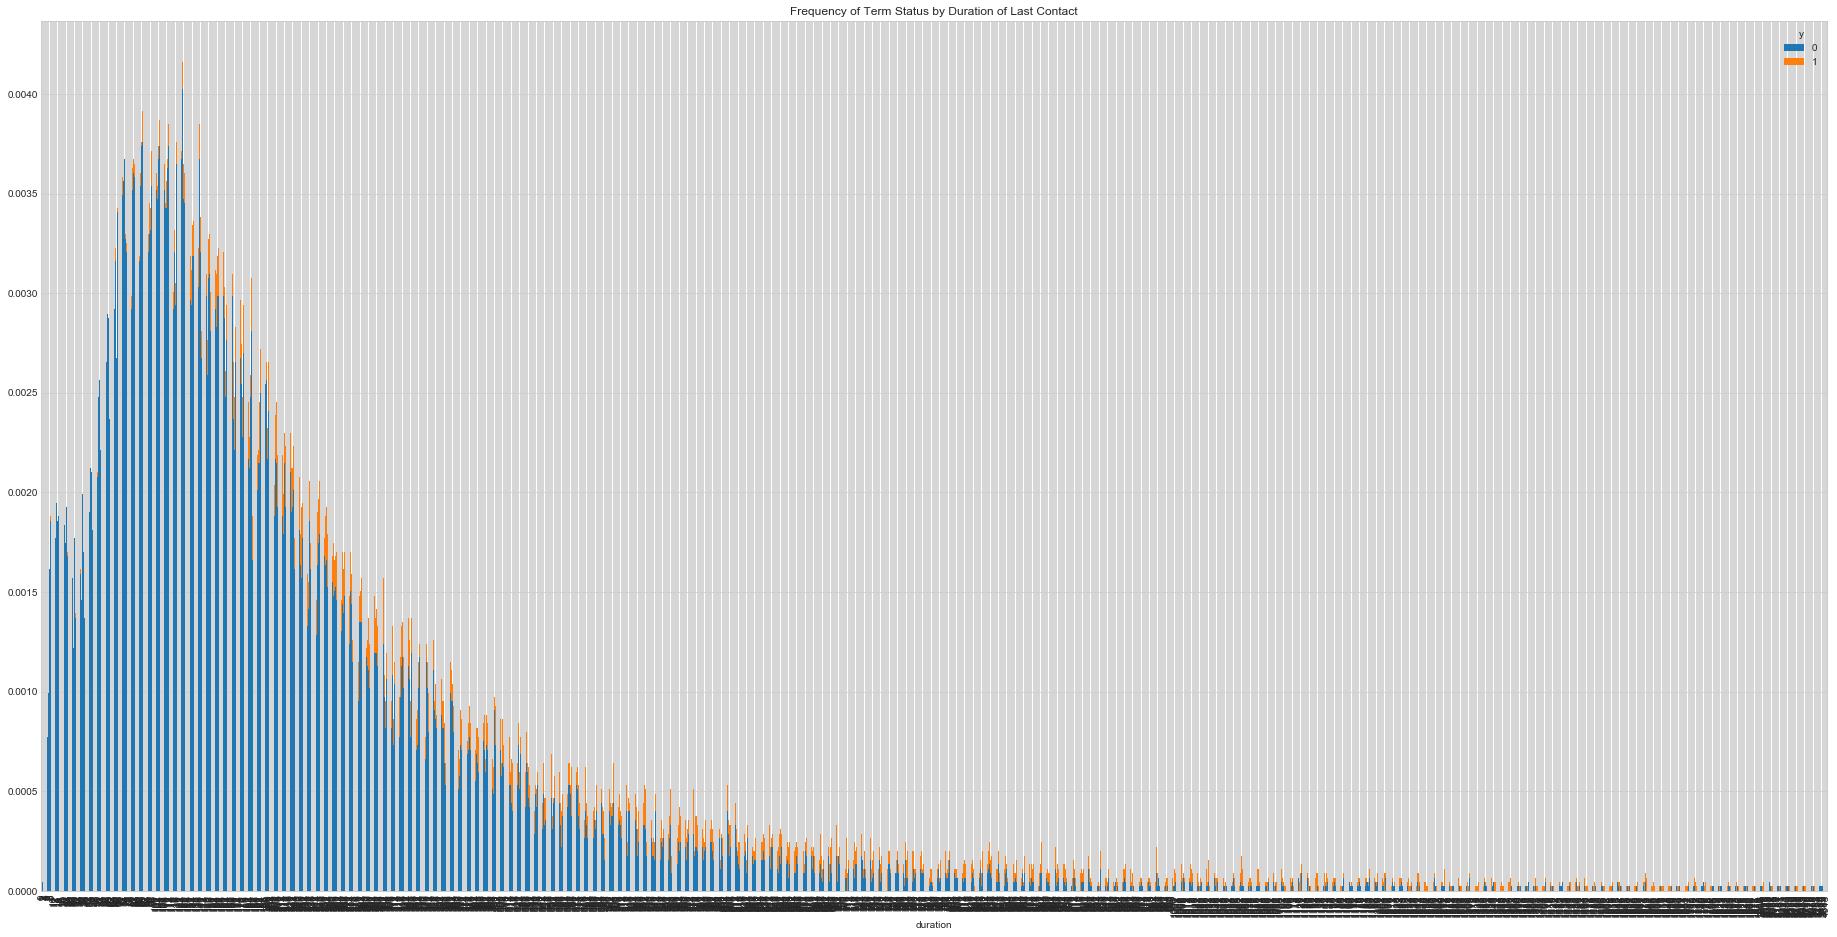

In [90]:
bank_data_copy.groupby(['duration', 'y']).size().groupby(level=0).apply(lambda x: x/bank_data_copy.shape[0]).unstack().plot(kind='bar', title= "Frequency of Term Status by Duration of Last Contact", figsize=(32, 16), stacked=True)

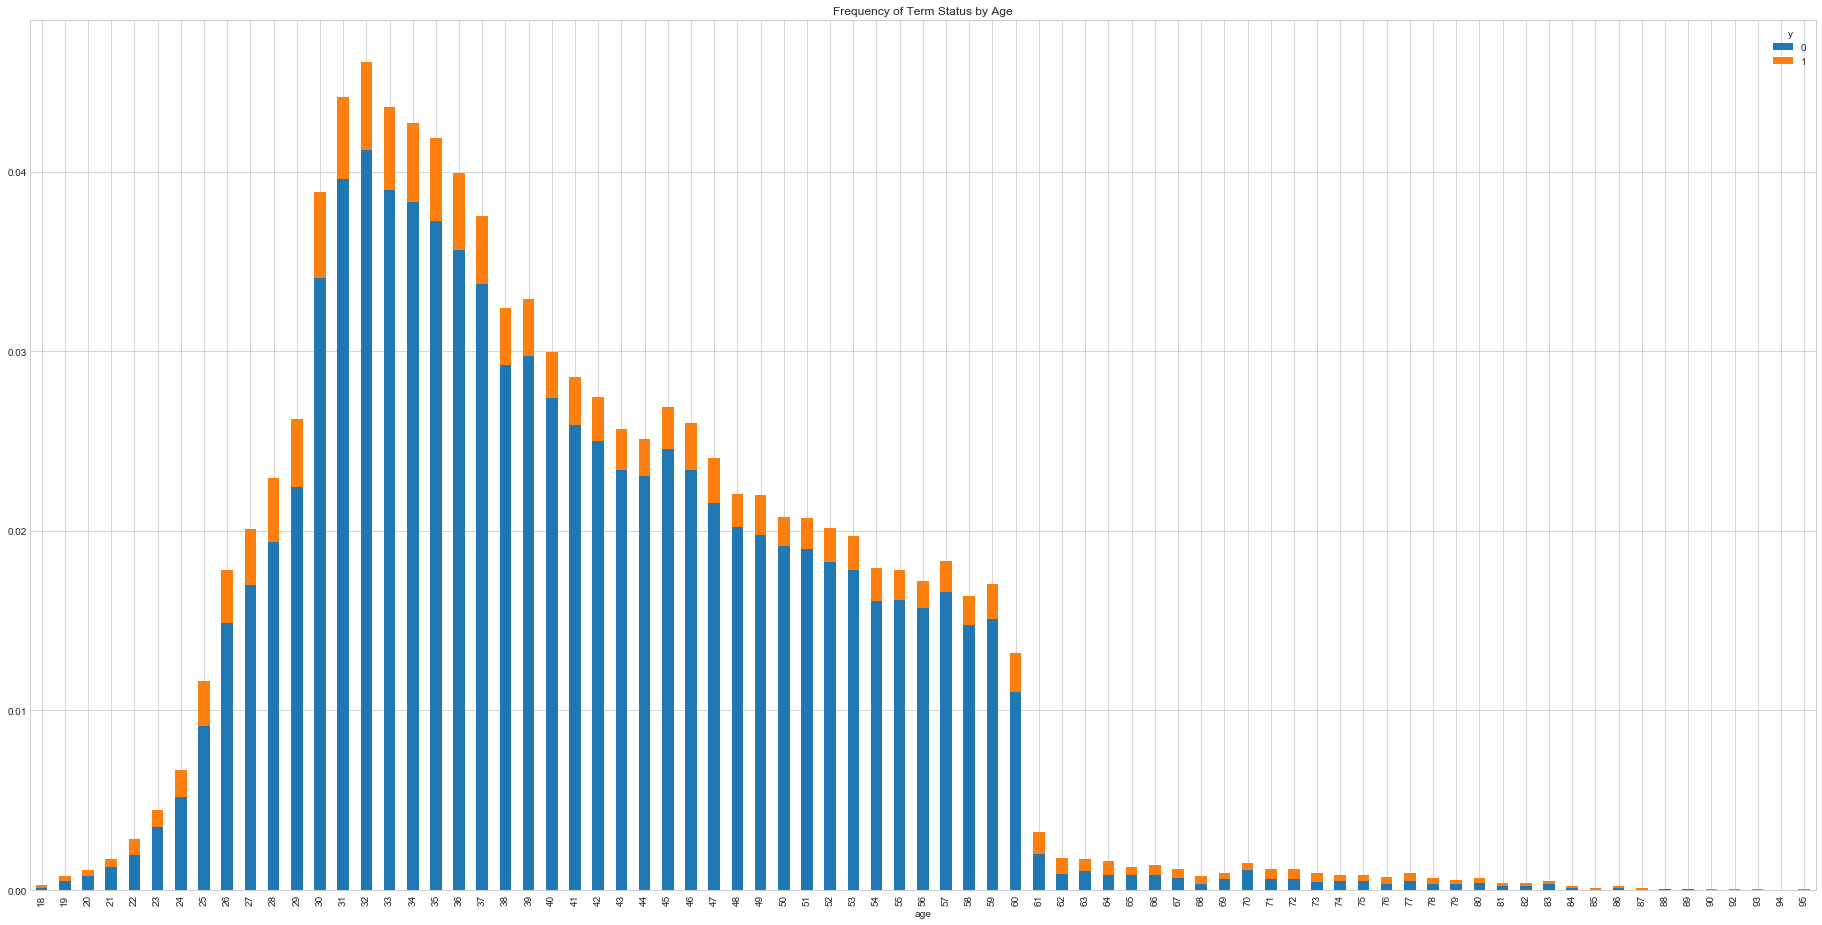

In [112]:
bank_data_copy.groupby(['age', 'y']).size().groupby(level=0).apply(lambda x: x/bank_data_copy.shape[0]).unstack().plot(kind='bar', title= "Frequency of Term Status by Age", stacked=True, figsize=(32, 16))

[Text(0.5,0,'Day')]

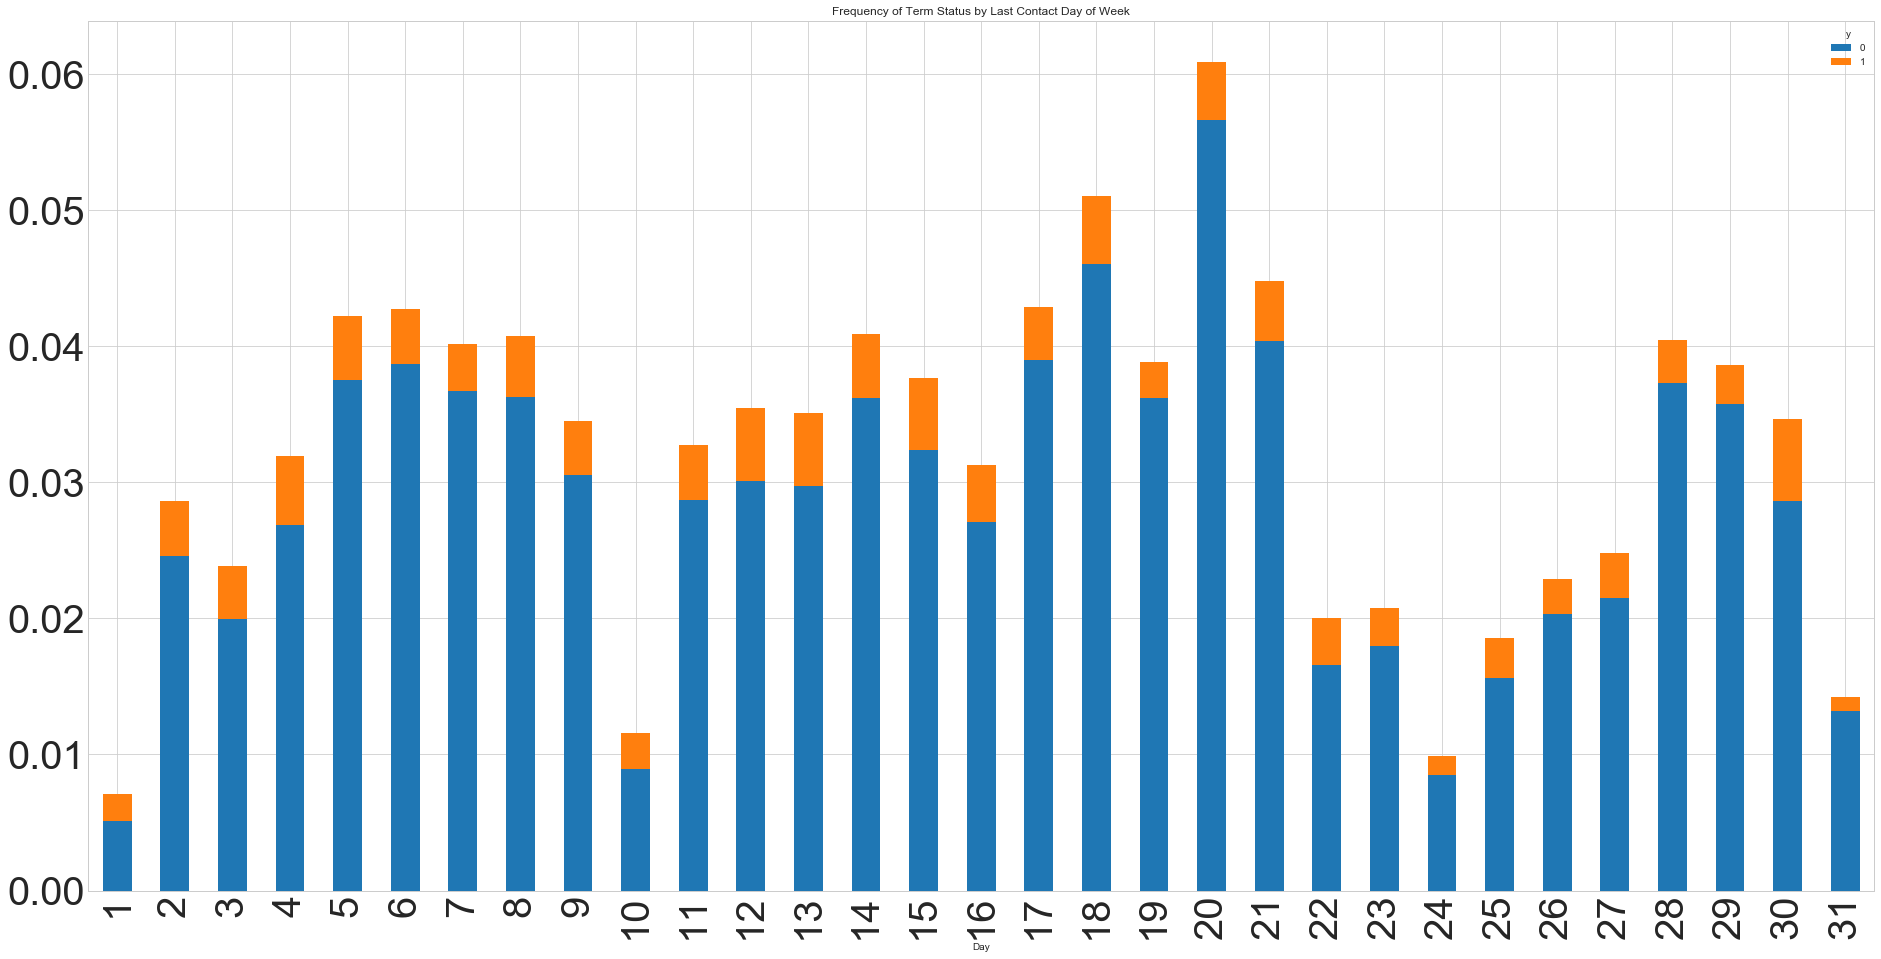

In [111]:
bank_data_copy.groupby(['day', 'y']).size().groupby(level=0).apply(lambda x: x/bank_data_copy.shape[0]).unstack().plot(kind='bar', title= "Frequency of Term Status by Last Contact Day of Week", figsize=(32, 16), fontsize=40, stacked=True).set(xlabel='Day')

[Text(0.5,0,'# of Calls')]

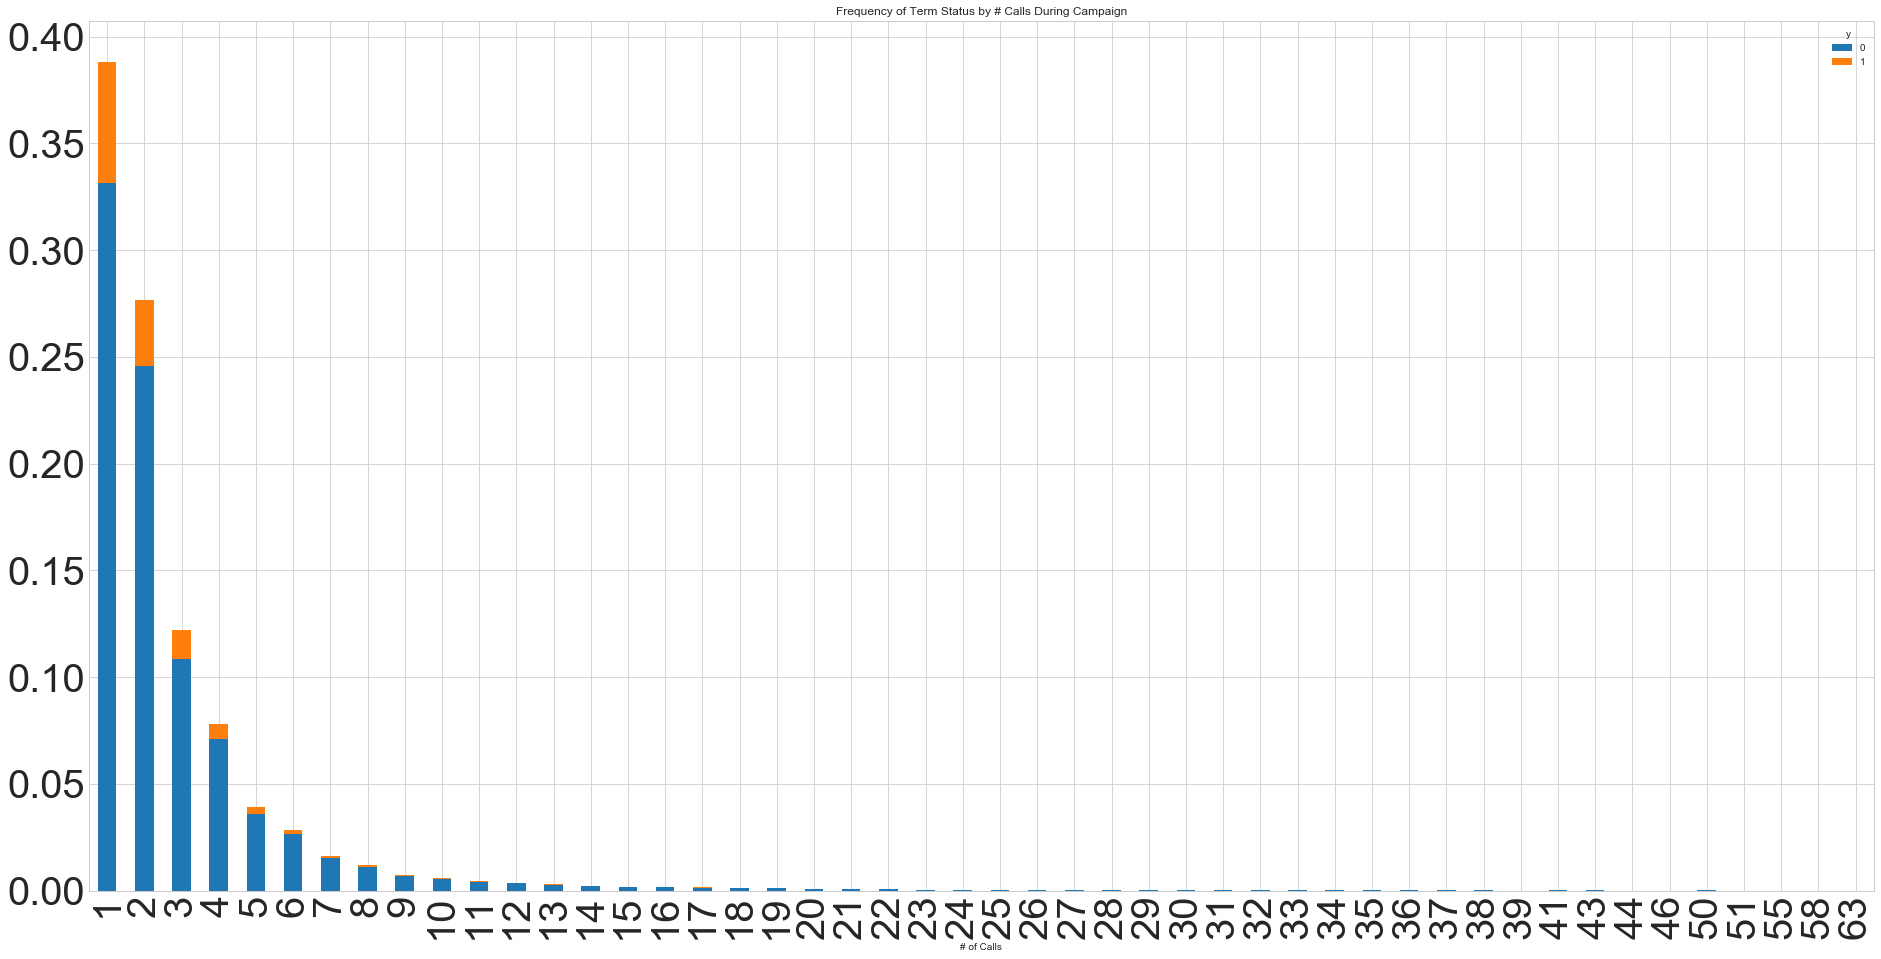

In [130]:
bank_data_copy.groupby(['campaign', 'y']).size().groupby(level=0).apply(lambda x: x/bank_data_copy.shape[0]).unstack().plot(kind='bar', title= "Frequency of Term Status by # Calls During Campaign", stacked=True, fontsize=40, figsize=(32, 16)).set(xlabel="# of Calls")

In [168]:
encoder = LabelEncoder()
encoded_df = bank_data_copy.copy()
dependent_var = encoded_df['y']

In [169]:
encoded_df = encoded_df.drop(['y'],axis=1)

In [170]:
encoded_df = encoded_df.apply(encoder.fit_transform)

In [171]:
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3


In [172]:
encoded_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22.936055,4.339762,1.167725,1.224813,0.018027,1963.307469,0.555838,0.160226,0.640242,14.806419,5.523014,255.338502,1.762381,40.154188,0.573356,2.559974
std,10.618004,3.272657,0.608230,0.747997,0.133049,1463.533246,0.496878,0.366820,0.897951,8.322476,3.006911,239.660852,3.075904,96.917547,1.877700,0.989059
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,1.000000,1.000000,1.000000,0.000000,988.000000,0.000000,0.000000,0.000000,7.000000,3.000000,103.000000,0.000000,0.000000,0.000000,3.000000
50%,21.000000,4.000000,1.000000,1.000000,0.000000,1364.000000,1.000000,0.000000,0.000000,15.000000,6.000000,180.000000,1.000000,0.000000,0.000000,3.000000
75%,30.000000,7.000000,2.000000,2.000000,0.000000,2344.000000,1.000000,0.000000,2.000000,20.000000,8.000000,319.000000,2.000000,0.000000,0.000000,3.000000
max,76.000000,11.000000,2.000000,3.000000,1.000000,7167.000000,1.000000,1.000000,2.000000,30.000000,11.000000,1572.000000,47.000000,558.000000,40.000000,3.000000


In [173]:
encoded_df2 = pd.concat([encoded_df, dependent_var], axis=1)

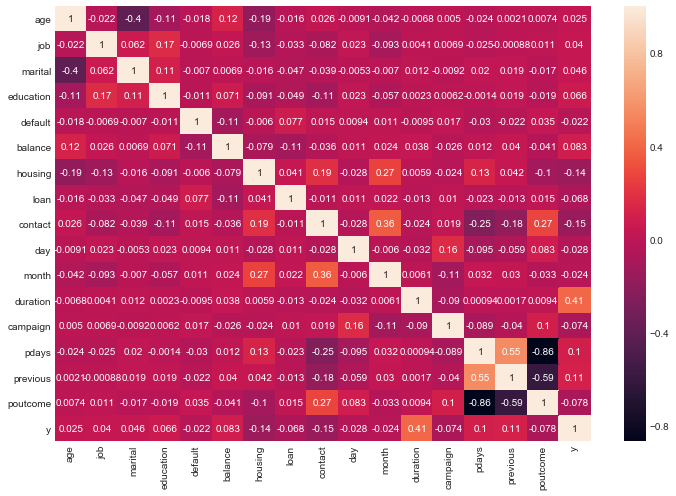

In [174]:
plt.figure(figsize=(12, 8))
corr = encoded_df2.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [146]:
corr_target = abs(corr['y'])
relevant_features = corr_target[corr_target > 0.10]
print(relevant_features)

housing     0.139173
contact     0.148395
duration    0.407875
pdays       0.101449
previous    0.114407
y           1.000000
Name: y, dtype: float64


In [153]:
feature_corr = encoded_df[['housing', 'duration']].corr()
feature_corr2 = encoded_df[['pdays', 'previous']].corr()
feature_corr3 = encoded_df[['contact', 'housing']].corr()
feature_corr4 = encoded_df[['duration', 'pdays']].corr()
feature_corr5 = encoded_df[['duration', 'previous']].corr()

feature_corrs = [feature_corr, feature_corr2, feature_corr3, feature_corr4, feature_corr5]

In [154]:
for corr in feature_corrs:
    print(corr)

           housing  duration
housing   1.000000  0.005878
duration  0.005878  1.000000
            pdays  previous
pdays     1.00000   0.55008
previous  0.55008   1.00000
          contact   housing
contact  1.000000  0.188123
housing  0.188123  1.000000
          duration     pdays
duration  1.000000  0.000942
pdays     0.000942  1.000000
          duration  previous
duration   1.00000   0.00173
previous   0.00173   1.00000


In [180]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, bank_data_copy['y'], test_size=0.2, random_state = 11)

In [189]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)
log_reg_trained = log_reg.fit(X_train, y_train)

In [202]:
print('logistic regression training accuracy is {}'.format(log_reg_trained.score(X_train, y_train)))

logistic regression training accuracy is 0.8918104401681044


In [194]:
pred = log_reg.predict(X_test)

In [203]:
print('logistic regression testing accuracy score is {}'.format(sk.metrics.accuracy_score(y_test, pred)))

logistic regression testing accuracy score is 0.8899701426517749


In [200]:
dec_tree = DecisionTreeClassifier()
dec_tree_model = dec_tree.fit(X_train, y_train)

In [201]:
print('decision tree training accuracy is {}'.format(dec_tree.score(X_train, y_train)))

training accuracy is 1.0


In [204]:
pred_tree = dec_tree.predict(X_test)

In [205]:
print('decision tree testing accuracy score is {}'.format(sk.metrics.accuracy_score(y_test, pred_tree)))

decision tree testing accuracy score is 0.8751520513104059
